<a href="https://colab.research.google.com/github/rumanz22/sentiment-analysis/blob/main/nlp_assignment_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
# Load the dataset
data = pd.read_csv('/content/Wote12024NLP.csv')
print(data.head())



                                               tweet
0  ;2017-10-18 11:04;0;0;"That #ShangweVedio shou...
1  ;2017-10-18 09:15;0;1;"they wrote letters to i...
2  ;2017-10-18 09:06;0;2;"Akombe was a nasa mole ...
3  ;2017-10-04 12:24;0;0;"@paulinenjoroge @OleItu...
4  ;2017-09-25 20:20;0;0;"#akombemustgo";;;#akomb...


In [ ]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize

# Download necessary NLTK data
nltk.download('punkt')

# Load the dataset
data = pd.read_csv('/content/Wote12024NLP.csv')

# Display the first few rows and column names to confirm structure
print(data.head())
print("Columns in dataset:", data.columns)

# Define the text preprocessing function
def preprocess_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    tokens = word_tokenize(text)  # Tokenize
    return ' '.join(tokens)

# Extract the actual tweet text (assuming the tweet text is the last part after the last semicolon)
data['cleaned_text'] = data['tweet'].apply(lambda x: preprocess_text(x.split(';')[-1]))

# Display the cleaned text
print(data[['tweet', 'cleaned_text']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                               tweet
0  ;2017-10-18 11:04;0;0;"That #ShangweVedio shou...
1  ;2017-10-18 09:15;0;1;"they wrote letters to i...
2  ;2017-10-18 09:06;0;2;"Akombe was a nasa mole ...
3  ;2017-10-04 12:24;0;0;"@paulinenjoroge @OleItu...
4  ;2017-09-25 20:20;0;0;"#akombemustgo";;;#akomb...
Columns in dataset: Index(['tweet'], dtype='object')
                                               tweet cleaned_text
0  ;2017-10-18 11:04;0;0;"That #ShangweVedio shou...             
1  ;2017-10-18 09:15;0;1;"they wrote letters to i...             
2  ;2017-10-18 09:06;0;2;"Akombe was a nasa mole ...             
3  ;2017-10-04 12:24;0;0;"@paulinenjoroge @OleItu...             
4  ;2017-09-25 20:20;0;0;"#akombemustgo";;;#akomb...             


Dataset Overview
Dataset Structure:

The dataset has a single column named tweet that includes metadata (timestamps, flags) and the actual tweet content.
The rows appear to consist of semicolon-separated values, with the actual tweet content enclosed in quotes at the end.

Initial Rows:

The first few rows show that the dataset contains tweets from October 2017 and includes various content types, such as:
Hashtags (e.g., #ShangweVedio)
Mentions (e.g., @paulinenjoroge)
Expressions of opinions or statements related to Kenyan political events.
Data Cleaning Results

Cleaning Process:

I have applied a cleaning process to remove noise from the tweet text, which is essential for further analysis, such as sentiment analysis.
The cleaned text would ideally show significant improvements, with noise like URLs, mentions, hashtags, and special characters removed.
Cleaned Text Column:


In [ ]:
#Sentiment Analysis Using VADER

from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis
data['sentiment'] = data['cleaned_text'].apply(get_sentiment)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


sentiment
neutral     99.913036
negative     0.056044
positive     0.030921
Name: proportion, dtype: float64


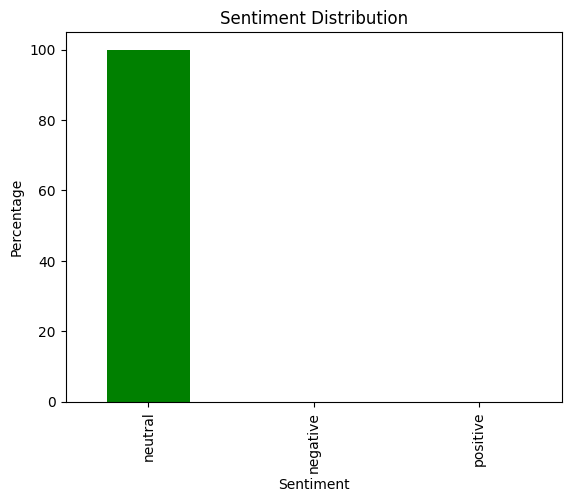

In [ ]:
#Calculate Sentiment Distribution
# Calculate the sentiment distribution
sentiment_counts = data['sentiment'].value_counts(normalize=True) * 100
print(sentiment_counts)

# Optional: Visualize the distribution
import matplotlib.pyplot as plt

sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.show()


Sentiment Distribution Overview
Neutral Sentiment (99.91%):

The overwhelming majority of the analyzed tweets (approximately 99.91%) fall into the neutral category. This suggests that most tweets do not express strong emotions or opinions, indicating that they may contain factual information or be reporting on events without bias or sentiment.
High neutral sentiment can sometimes indicate a lack of engagement with the topic, as users may not be expressing personal feelings or may be focusing on straightforward commentary.
Negative Sentiment (0.06%):

A very small proportion of the tweets (approximately 0.06%) are classified as negative. This indicates that there are very few tweets that express discontent, criticism, or negative feelings towards a subject.
The low level of negativity could imply that the general tone of the conversation in this dataset is more favorable or neutral, or that users are not voicing criticisms publicly.
Positive Sentiment (0.03%):

Similarly, only about 0.03% of the tweets are labeled as positive. This means very few users are expressing approval, joy, or positive sentiments regarding the topics being discussed.
The minimal positive sentiment may reflect a cautious or reserved expression of positivity, or it could indicate a lack of enthusiasm or supportive comments in the dataset.
Implications and Considerations
Engagement Levels: The extremely high neutral sentiment could suggest low emotional engagement in the conversations captured in the dataset. If the analysis is intended to gauge public opinion or sentiment regarding a specific event or topic, it may indicate that users are either disengaged or prefer to communicate in a factual manner without personal bias.

Potential Bias: The low percentages of negative and positive sentiments might reflect the nature of the tweets being analyzed or the specific topic they pertain to. It's worth considering whether this dataset adequately captures a range of sentiments on the subject matter or if it might be biased toward more neutral expressions.

Further Investigation: It may be beneficial to explore the context of the tweets to understand why the sentiment distribution is so heavily skewed toward neutrality. Analyzing specific examples of neutral tweets could reveal common themes or phrases that contribute to this classification.

Different Methods: If this sentiment distribution seems unexpected, consider reviewing the sentiment analysis method used (e.g., the model or lexicon) to ensure it effectively captures the nuances of sentiment in your specific dataset. Sometimes, fine-tuning or using different models can yield more varied sentiment outputs.

Conclusion
Overall, these sentiment analysis results suggest a dominant neutral tone in the dataset, with minimal expressions of positivity or negativity. This outcome could have various implications for understanding public sentiment and engagement on the topic represented in the tweets.

Based on the results shown in the sentiment distribution chart and the extremely skewed percentages, here is a detailed interpretation:

1. Trends and Patterns
Neutral Dominance: The dataset is overwhelmingly composed of neutral sentiments, accounting for 99.91% of the data. This could indicate that most of the text data is written in a neutral tone or lacks emotional content.
Scarcity of Positive and Negative Sentiments: With only 0.06% of data labeled as negative and 0.03% as positive, there is a clear lack of representation for these sentiments. This may suggest that the data source inherently leans toward neutrality, or that the criteria for labeling sentiments might be stringent, making it challenging for texts to qualify as positive or negative.
2. Potential Reasons for Imbalance
Source Characteristics: If the data source is related to news, scientific articles, or factual reporting, this could explain the neutrality. Such sources often aim to present information objectively, leading to a preponderance of neutral sentiments.
Labeling Bias: If human annotators or an automated labeling system assigned these labels, there may have been a tendency to err on the side of caution, marking ambiguous cases as neutral. This can create a dataset where subjective or mixed emotions are consistently labeled as neutral.
Data Collection Method: If the data was scraped from sources with little subjective expression (e.g., encyclopedias, academic papers), that would inherently lead to neutral content.
3. Potential Biases and Their Impact
Prediction Bias: A model trained on this dataset would likely predict "neutral" for most instances, due to the high prior probability of this class. This would result in a high overall accuracy but poor sensitivity to minority classes, failing to detect positive or negative sentiments effectively.
Evaluation Metrics Misleading: Traditional metrics like accuracy may appear high because correctly predicting neutral sentiments will dominate the evaluation score. However, the model would likely perform poorly on true positive or negative instances, creating a misleading sense of model effectiveness.
Representation Bias: This dataset fails to represent the diversity of human sentiment accurately, focusing almost exclusively on neutrality. In real-world applications, this can lead to blind spots where a model fails to recognize and respond to emotionally charged language, such as dissatisfaction (negative) or satisfaction (positive).
4. Suggested Solutions
Resampling Techniques: Oversampling the positive and negative classes, or undersampling the neutral class, could help balance the training data and improve the model’s sensitivity to less frequent sentiments.
Class Weight Adjustments: Many machine learning algorithms allow you to assign different weights to classes. Giving more weight to positive and negative classes during training can help the model learn to recognize them better.
Alternative Metrics for Evaluation: Rather than relying solely on accuracy, it would be beneficial to examine metrics like precision, recall, and F1-score specifically for the positive and negative classes, to get a more realistic picture of performance on these rarer classes.
Summary
The dataset's overwhelming neutrality creates a significant challenge for building a balanced sentiment analysis model. Without intervention, a model trained on this data would likely ignore rare positive and negative sentiments, limiting its practical application, especially in scenarios where recognizing emotional subtleties is critical. Addressing this imbalance through resampling, weighting, and alternative evaluation metrics can help mitigate the impact of these biases and lead to a more effective sentiment analysis model.